In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#1 Understand the data

In [4]:
data.shape

(1000, 17)

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [8]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [9]:
#2 Clean the data

In [10]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
dataN = data.drop(['Invoice ID', 'Branch', 'Tax 5%', 'gross margin percentage'], axis=1)
dataN.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [12]:
#3 Relationship analysis

In [13]:
# QNS1 : GENDER - TO FIND out if there are any gender differences in terms of customers.

In [14]:
# ANS : Female and Male are balanced.

dataN['Gender'].value_counts()     

Female    501
Male      499
Name: Gender, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

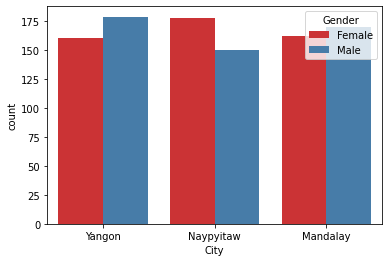

In [15]:
# ANS : Between Cities, Yangon has more Male customers, Naypyitaw has more Female customers. Mandalay are balanced.

sns.countplot(x='City', hue='Gender', data=dataN, palette="Set1")

<AxesSubplot:xlabel='Customer type', ylabel='count'>

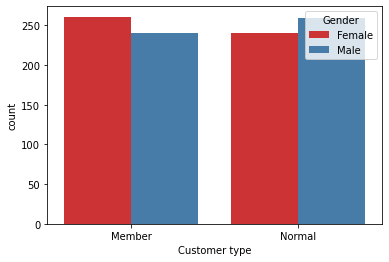

In [16]:
# ANS : There are more Female holding memberships

sns.countplot(x='Customer type', hue='Gender', data=dataN, palette="Set1")

<AxesSubplot:xlabel='Gender', ylabel='cogs'>

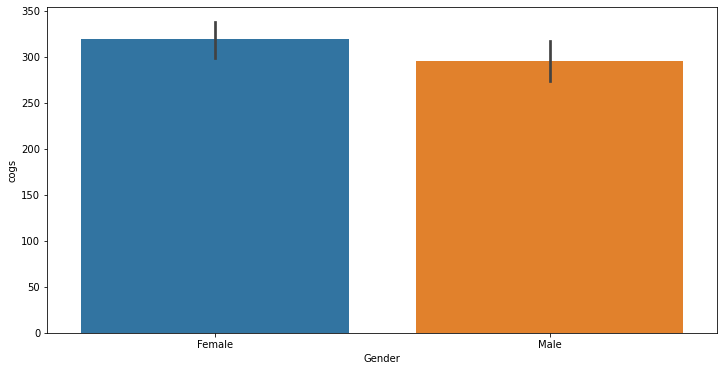

In [17]:
# ANS : For Spending, there are more Female spending.

plt.figure(figsize= (12,6))
sns.barplot(x = dataN['Gender'], y = dataN['cogs'])

In [18]:
# QNS2 : Product Line - To find out what product line generates more sales.

<AxesSubplot:xlabel='Product line', ylabel='cogs'>

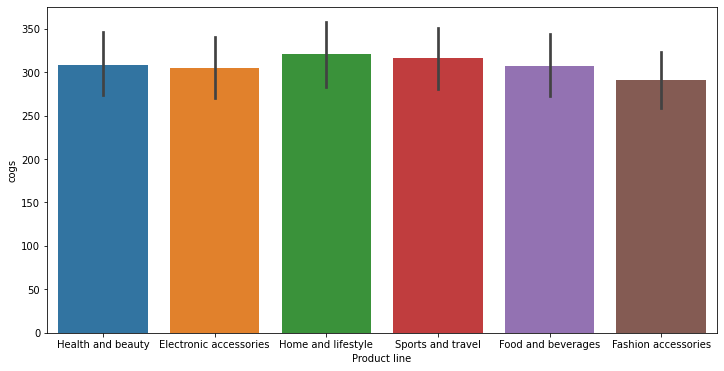

In [19]:
# ANS : General the Product lines look almost balanced

plt.figure(figsize=(12,6))
sns.barplot(x=dataN['Product line'], y=dataN['cogs'])

<AxesSubplot:xlabel='City', ylabel='count'>

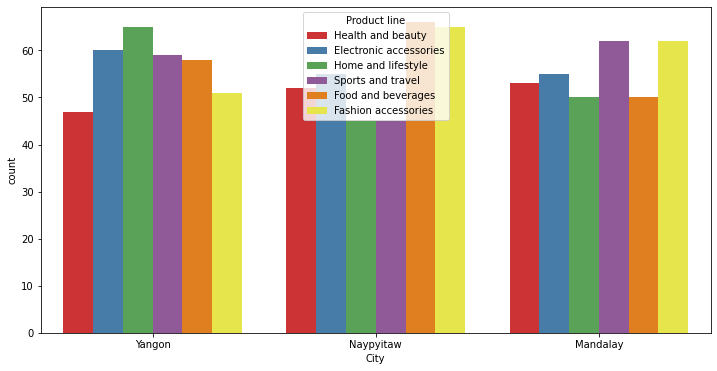

In [20]:
# ANS : When we break by location, we see some trends

plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Product line', data=dataN, palette="Set1")

In [21]:
# QNS3 : Promotion - To find out if there is a trend in period where more customers enter the store.

(array([119., 112., 100., 115.,  95.,  87.,  85.,  86.,  85.,  63.,  53.]),
 array([  0.        ,  45.90909091,  91.81818182, 137.72727273,
        183.63636364, 229.54545455, 275.45454545, 321.36363636,
        367.27272727, 413.18181818, 459.09090909, 505.        ]),
 <BarContainer object of 11 artists>)

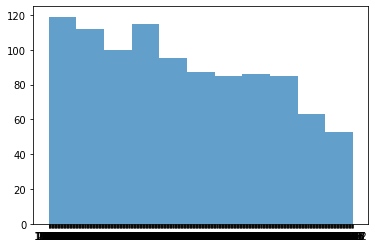

In [22]:
# Purchase time (10am to 9pm) 11hrs
plt.hist(dataN.Time, bins=11, alpha=0.7)

In [23]:
# QNS4 : Payment Method - To find out what payment methods are more popular.

<AxesSubplot:xlabel='City', ylabel='count'>

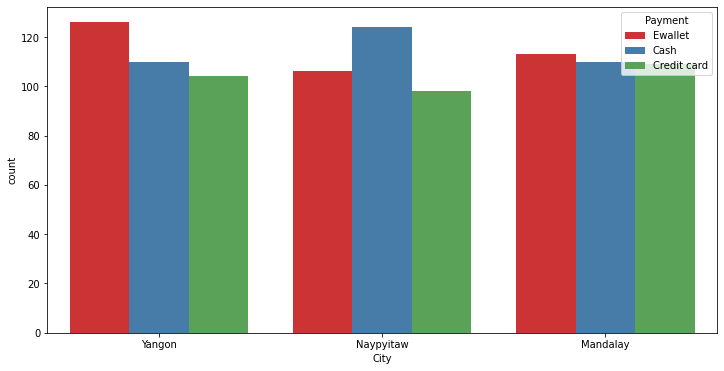

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Payment', data=dataN, palette="Set1")